In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor

In [2]:
# Load the diabetes dataset
diabetes_full = pd.read_csv('diabetesNHANES.csv')

# Select a random sample of 50 instances
seed = 2846
diabetes = diabetes_full.sample(n=50, random_state=seed) 
diabetes.head()

,SEQN,diabetes,glucose,insulin,cholesterol,outcome,systolic,diastolic
1066,97564,no,5.61,21.07,129,0,73,107
126,96333,yes,7.44,12.26,153,1,57,97
451,100915,no,5.66,11.36,207,0,67,133
894,99018,no,6.11,21.68,195,0,70,131
926,95892,no,5.55,18.92,180,0,69,121


In [3]:
# Define input and output features
X = diabetes[['glucose']].values.reshape(-1, 1)
y = diabetes[['insulin']].values.reshape(-1, 1)

### Fitting a linear model using squared loss

In [4]:
# Initialize and fit linear regression model fitted with least squares
lrModel = LinearRegression()
lrModel.fit(X,y)

LinearRegression()

In [5]:
# Show intercept and weight for Glucose
print(lrModel.intercept_)
print(lrModel.coef_)

[-17.67326079]
[[5.15206086]]


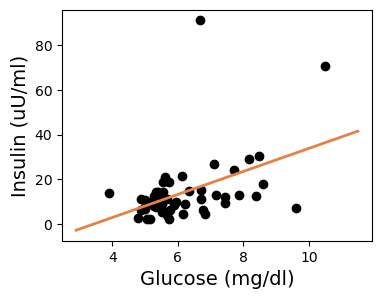

In [6]:
# Plot data and predicted regression line
xVals = np.linspace(min(X)-1, max(X)+1, 100)

fig = plt.figure(figsize = (4,3))
plt.scatter(diabetes[['glucose']], diabetes[['insulin']], color='black')
plt.plot(xVals, lrModel.predict(xVals), color='#E68143', linewidth=2, label='Squared loss')
plt.xlabel('Glucose (mg/dl)', fontsize=14)
plt.ylabel('Insulin (uU/ml)', fontsize=14)

plt.show()

In [7]:
# Return the mean absolute error
metrics.mean_absolute_error(y, lrModel.predict(X))

7.807279805688346

In [8]:
# Return the mean squared error
metrics.mean_squared_error(y, lrModel.predict(X))

187.01592395776632

### Fitting a linear model using Huber loss

In [9]:
# Initialize and fit linear regression model fitted with Huber loss
hrModel = HuberRegressor()
hrModel.fit(X,np.ravel(y))

HuberRegressor()

In [10]:
# Show intercept and weight for Glucose
print(hrModel.intercept_)
print(hrModel.coef_)

-6.62506302575551
[2.94329403]


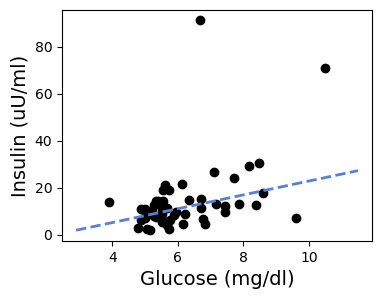

In [11]:
# Plot data and predicted regression lines
xVals = np.linspace(min(X)-1, max(X)+1, 100)

fig = plt.figure(figsize = (4,3))
plt.scatter(diabetes[['glucose']], diabetes[['insulin']], color='black')
plt.plot(xVals, hrModel.predict(xVals), color='#5780DC', linewidth=2, linestyle='dashed', label='Huber loss')
plt.xlabel('Glucose (mg/dl)', fontsize=14)
plt.ylabel('Insulin (uU/ml)', fontsize=14)

plt.show()

In [12]:
# Return the mean absolute error for the model fit with Huber loss
metrics.mean_absolute_error(y, hrModel.predict(X))

7.3331659203097965

In [13]:
# Return the mean squared error for the model fit with Huber loss
metrics.mean_squared_error(y, hrModel.predict(X))

202.97017006406

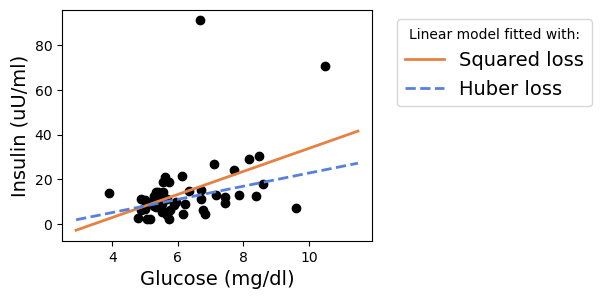

In [14]:
# Plot data and both predicted regression lines
xVals = np.linspace(min(X)-1, max(X)+1, 100)

fig = plt.figure(figsize = (4,3))
plt.scatter(diabetes[['glucose']], diabetes[['insulin']], color='black')
plt.plot(xVals, lrModel.predict(xVals), color='#E68143', linewidth=2, label='Squared loss')
plt.plot(xVals, hrModel.predict(xVals), color='#5780DC', linewidth=2, linestyle='dashed', label='Huber loss')
plt.xlabel('Glucose (mg/dl)', fontsize=14)
plt.ylabel('Insulin (uU/ml)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=14, title='Linear model fitted with:')

plt.show()